# Libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [169]:
# Save to df
data = pd.read_csv('spaceship-titanic/train.csv')
label = data['Transported']

# Shape
print('Data shape:', data.shape)

Data shape: (8693, 14)


Now let's understand the data

In [170]:
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

Delate Name

In [171]:
# remove Transported
data = data.drop(['Transported'], axis=1)

#remove Name
data = data.drop(['Name'], axis=1)

Let's focus on the properties of the numerical features

In [172]:
data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_49805/60273022.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



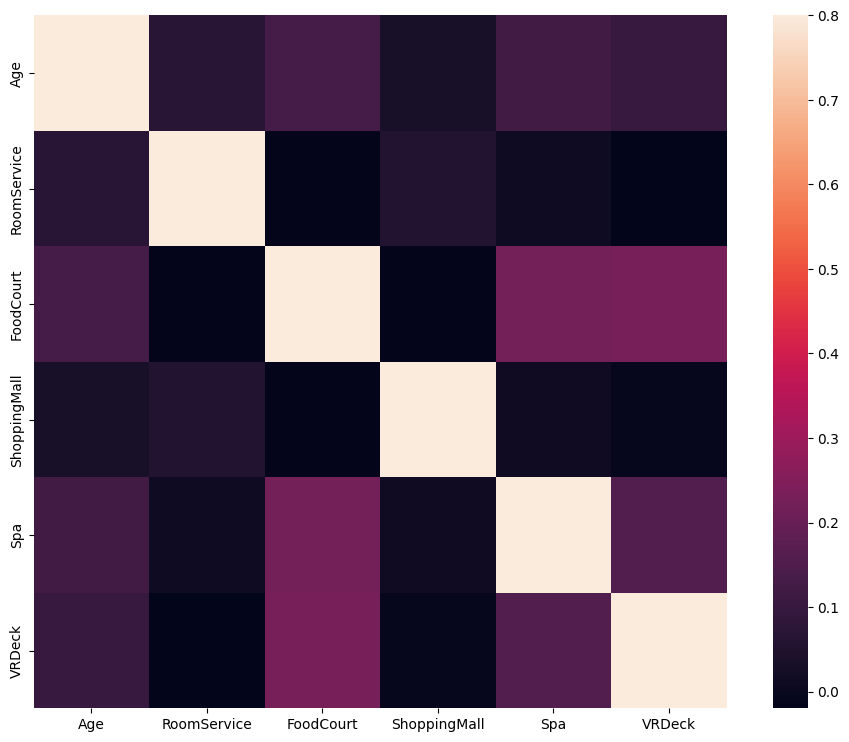

In [173]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


Here we create 2 lists with the name of categorical features and numerical features

In [174]:
num_features = []
cat_features = []

for i,f in enumerate(data.keys()):
    if data.dtypes[i] == 'float64':
        num_features.append(f)
    else:
        cat_features.append(f)


In [175]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [176]:
cat_features

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

## Numerical Features

In [177]:
data[num_features]

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0    44.0
2     58.0         43.0     3576.0           0.0  6715.0    49.0
3     33.0          0.0     1283.0         371.0  3329.0   193.0
4     16.0        303.0       70.0         151.0   565.0     2.0
...    ...          ...        ...           ...     ...     ...
8688  41.0          0.0     6819.0           0.0  1643.0    74.0
8689  18.0          0.0        0.0           0.0     0.0     0.0
8690  26.0          0.0        0.0        1872.0     1.0     0.0
8691  32.0          0.0     1049.0           0.0   353.0  3235.0
8692  44.0        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 6 columns]

Age - The age of the passenger.

<Axes: xlabel='Age', ylabel='Count'>

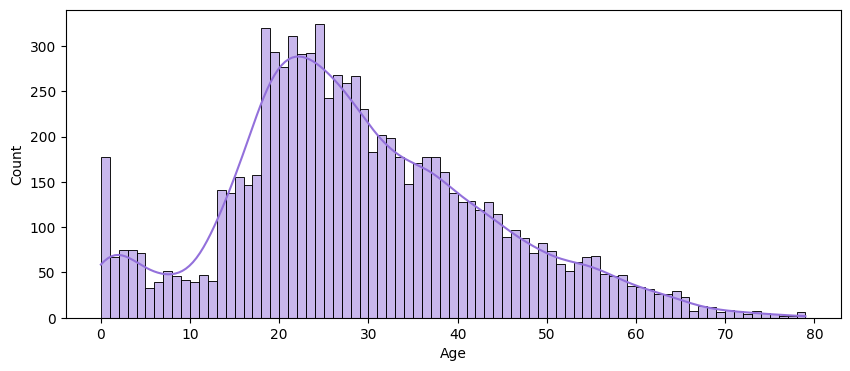

In [178]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Age', binwidth=1, kde=True, color='mediumpurple')

RoomService: The amount of money that tha passenger spent for RoomService  

<Axes: xlabel='RoomService', ylabel='Count'>

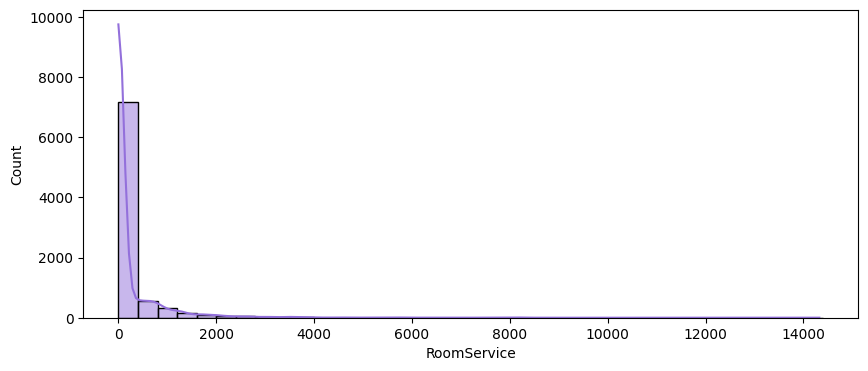

In [179]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='RoomService', binwidth=400, kde=True, color='mediumpurple')

FoodCourt: The amount of money that tha passenger spent for FoodCourt  

<Axes: xlabel='FoodCourt', ylabel='Count'>

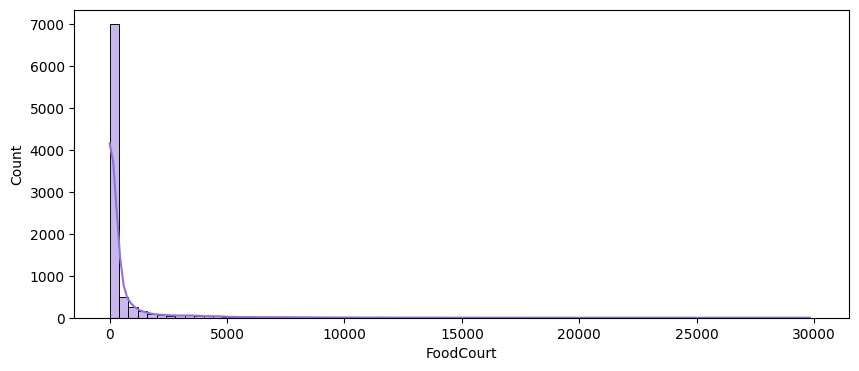

In [180]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='FoodCourt', binwidth=400, kde=True, color='mediumpurple')

ShoppingMall: The amount of money that tha passenger spent for ShoppingMall  

<Axes: xlabel='ShoppingMall', ylabel='Count'>

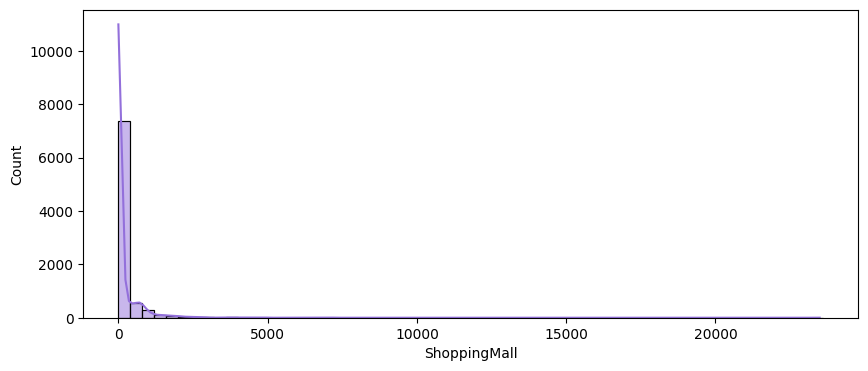

In [181]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='ShoppingMall', binwidth=400, kde=True, color='mediumpurple')

Spa: The amount of money that tha passenger spent for Spa  

<Axes: xlabel='Spa', ylabel='Count'>

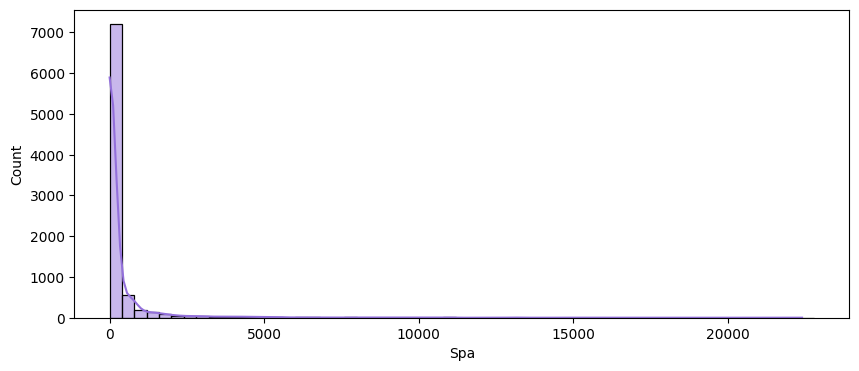

In [182]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Spa', binwidth=400, kde=True, color='mediumpurple')

VRDeck: The amount of money that tha passenger spent for VRDeck  

<Axes: xlabel='VRDeck', ylabel='Count'>

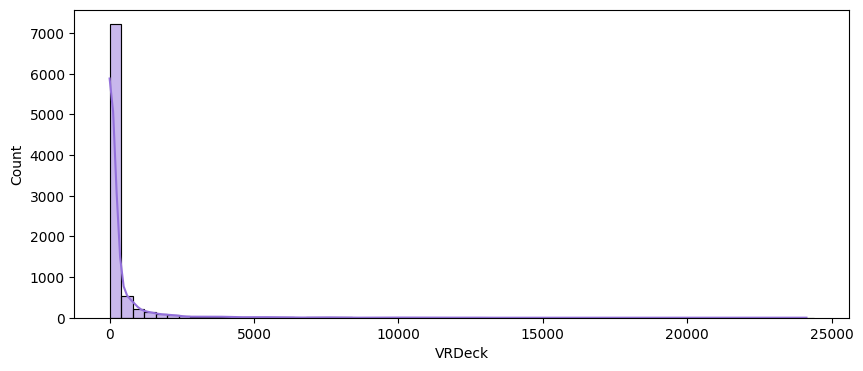

In [183]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='VRDeck', binwidth=400, kde=True, color='mediumpurple')

As we can clearly see, those features have the same distribution. 
From those plots we cannot say that the same group of people has spent the money in all the categories, but for the porpouse of this analysis we just care about the fact that those people have spent money.

to verify that we try to clusterize those features and see if there are results

In [184]:
services_features =['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [185]:
services = data[services_features]
services.head()

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0          0.0        0.0           0.0     0.0     0.0
1        109.0        9.0          25.0   549.0    44.0
2         43.0     3576.0           0.0  6715.0    49.0
3          0.0     1283.0         371.0  3329.0   193.0
4        303.0       70.0         151.0   565.0     2.0

<Figure size 500x500 with 0 Axes>

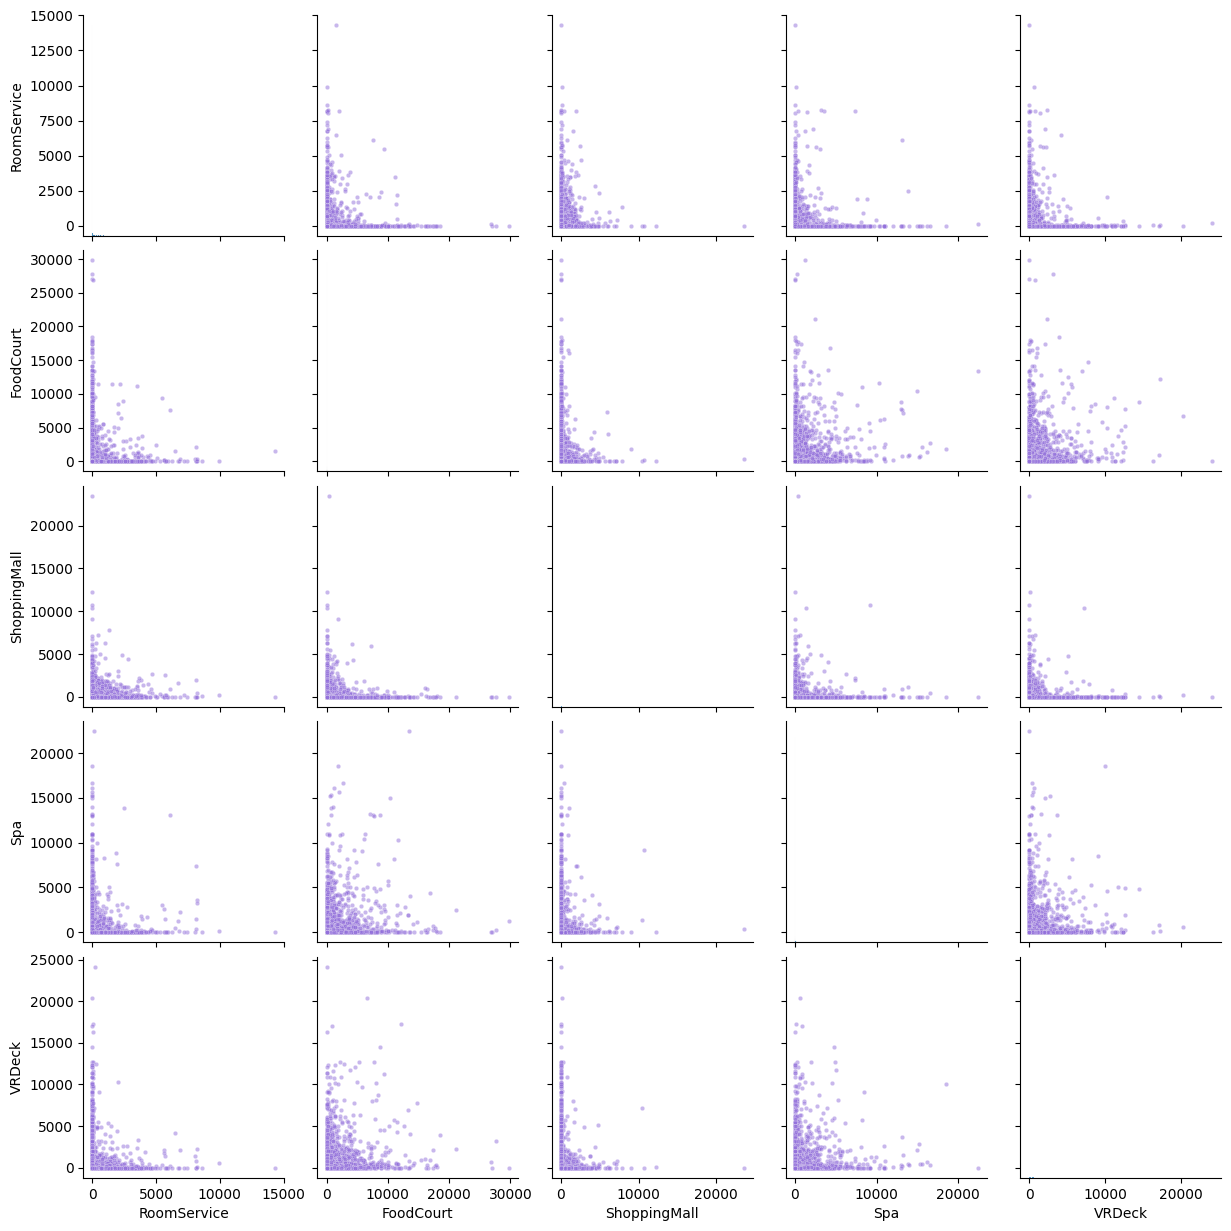

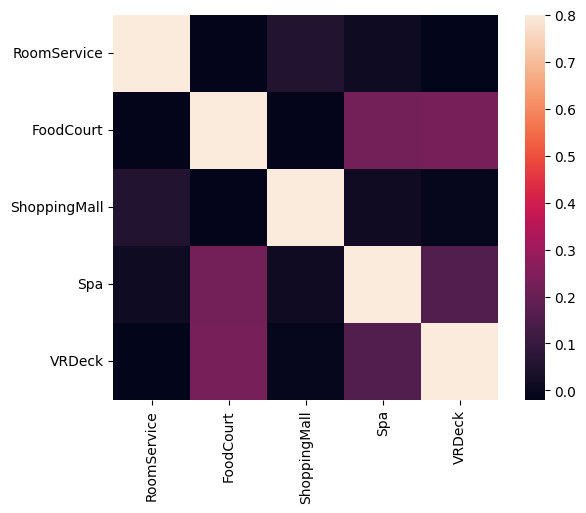

In [186]:
# # look the correlation of the features using subplots using seaborn
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(5,5))
sns.pairplot(services, vars= features, diag_kind="hist", plot_kws={'alpha':0.5, 's':10, 'color': 'mediumpurple'})
plt.show()


#plot correlation matrix
corrmat = services.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True);




## Categorical Features

* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

<Axes: xlabel='HomePlanet', ylabel='count'>

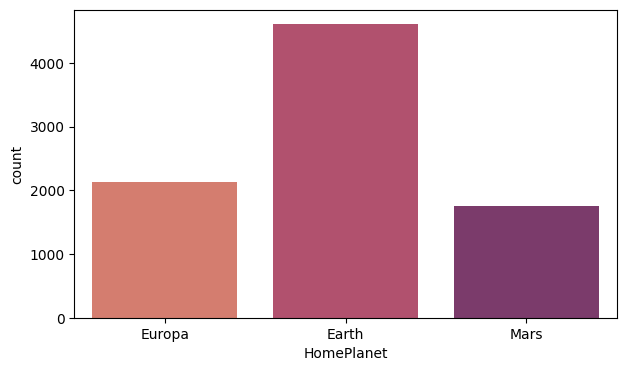

In [187]:
fig=plt.figure(figsize=(7,4))
palette = {0: "#9900b4", 1: "#0054b4", 2: "#b4004c"}

sns.countplot(data=data, x='HomePlanet', palette='flare')


 * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

<Axes: xlabel='CryoSleep', ylabel='count'>

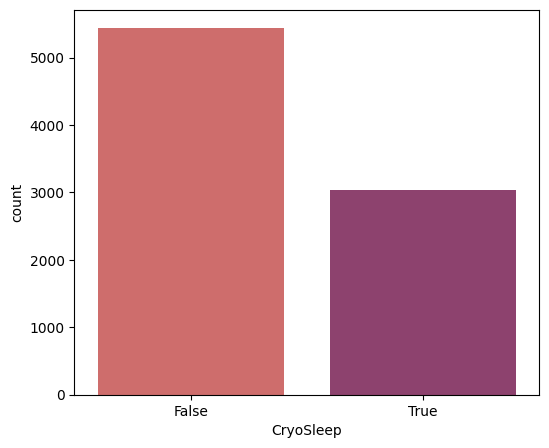

In [188]:
fig=plt.figure(figsize=(6,5))

sns.countplot(data=data, x='CryoSleep', palette='flare')


* **Destination** - The planet the passenger will be debarking to.

<Axes: xlabel='Destination', ylabel='count'>

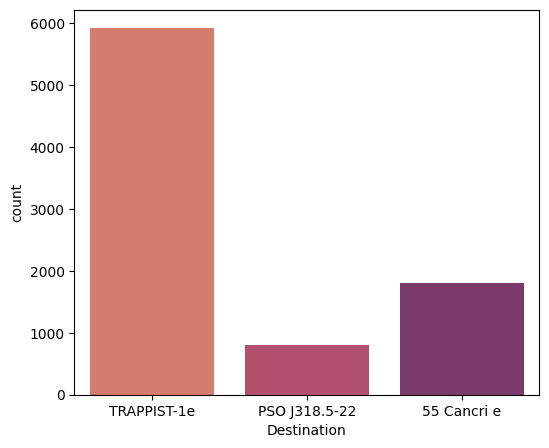

In [189]:
fig=plt.figure(figsize=(6,5))

sns.countplot(data=data, x='Destination', palette='flare')


 * **VIP** - Whether the passenger has paid for special VIP service during the voyage.

<Axes: xlabel='VIP', ylabel='count'>

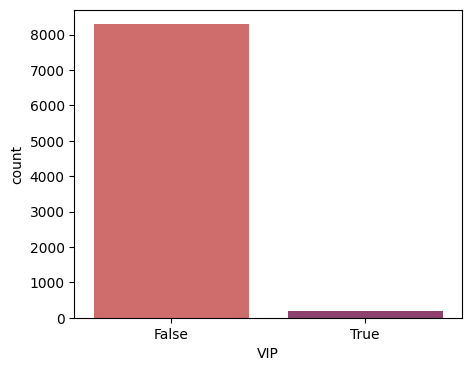

In [190]:
fig=plt.figure(figsize=(5,4))

sns.countplot(data=data, x='VIP', palette='flare')


In [191]:
cat_features

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

PassengerID

* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [192]:
data['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

[1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 5, 6, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 

Text(0.5, 1.0, 'Group distribution')

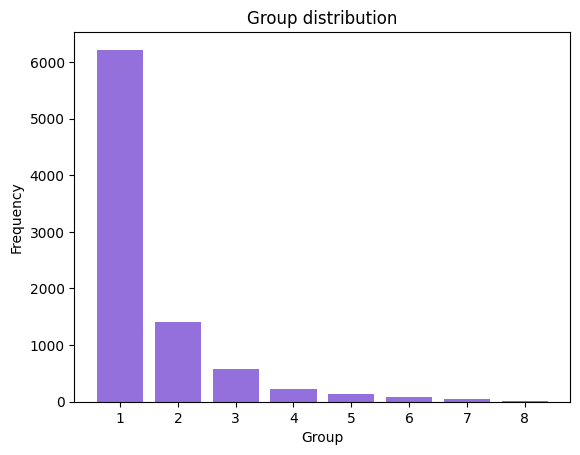

In [193]:
gruop, member = [],[]
for pID in data['PassengerId']:
    gruop.append(int(pID[0:4]))
    member.append(int(pID[5:7]))

fres, bins = np.histogram(member, np.linspace(0.5,8.5,9))
bins = [1,2,3,4,5,6,7,8]
print(member)
plt.bar(bins,fres,  color='mediumpurple')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Group distribution')

In [194]:
np.linspace(0.5,7.5,8)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

In [195]:
unique, counts = np.unique(gruop, return_counts=True)
unique

array([   1,    2,    3, ..., 9278, 9279, 9280])

<Figure size 1000x400 with 0 Axes>

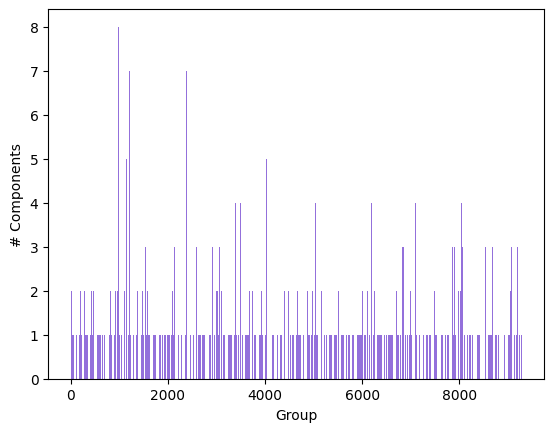

<Figure size 1000x400 with 0 Axes>

In [196]:
unique, counts = np.unique(gruop, return_counts=True)
plt.bar(unique,counts, color='mediumpurple')
plt.xlabel('Group')
plt.ylabel('# Components')

plt.figure(figsize = (10,4))


In [197]:
#now split the feature IdPassenger in two features, group and member
data['Group'] = gruop
data['Member'] = member
data.head()

# print(data['Member'].unique())


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Group  Member  
0          0.0        0.0           0.0     0.0     0.0      1       1  
1        109.0        9.0          25.0   549.0    44.0      2       1  
2         43.0     3576.0           0.0  6715.0    49.0      3       1  
3          0.0     1283.0         371.0  3329.0   193.0      3       2  
4        303.0       70.0         151.0   565.0     2.0      4       1

In [198]:
if 'PassengerId' in data.keys():
    data = data.drop(['PassengerId'], axis=1)

Cabin

* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [199]:
data['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [200]:
trys = 'E/608/S'
trys = trys.split('/')
trys

['E', '608', 'S']

In [201]:
cabin_dict = {
    'Deck': [],
    'Num': [],
    'Side': []
}
for c in data["Cabin"]:
    #split c by /
    if type(c) == float:
        cabin_dict['Deck'].append(np.nan)
        cabin_dict['Num'].append(np.nan)
        cabin_dict['Side'].append(np.nan)
        continue
    c = c.split('/')
    for i,let in enumerate('ABCDEFGT'):
        if c[0] == let:
            cabin_dict['Deck'].append(let)

    # cabin_dict['Deck'].append(c[0])
    cabin_dict['Num'].append(int(c[1]))

    for i,let in enumerate('SP'):
        if c[2] == let:
            cabin_dict['Side'].append(let)

# cabin_dict into dataframe
cabin_df = pd.DataFrame(cabin_dict)
cabin_df

Deck     Num Side
0       B     0.0    P
1       F     0.0    S
2       A     0.0    S
3       A     0.0    S
4       F     1.0    S
...   ...     ...  ...
8688    A    98.0    P
8689    G  1499.0    S
8690    G  1500.0    S
8691    E   608.0    S
8692    E   608.0    S

[8693 rows x 3 columns]

In [202]:
#check if nan values are in the dataframe
cabin_df.isnull().sum()

Deck    199
Num     199
Side    199
dtype: int64

In [203]:
color = [] 
for sid in cabin_dict['Side']:
    if sid == 'S':
        color.append('red')
    if sid == 'P':
        color.append('blue')

creo un dict temporaneo con valori numerici per fare il plot

In [204]:
num_cabin_df = {}

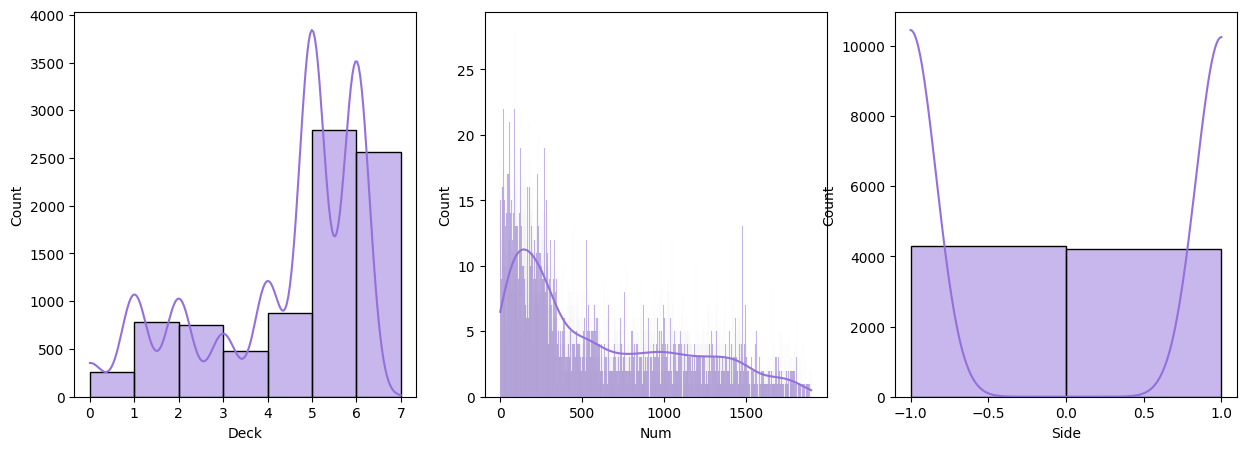

In [205]:
# Mappa le colonne non numeriche in valori numerici
num_cabin_df['Deck'] = cabin_df['Deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G':6, 'T':7})
num_cabin_df['Side'] = cabin_df['Side'].map({'S': -1, 'P': 1})
num_cabin_df['Num'] = cabin_df['Num']

# plot the distribution of the features using subplot(1,3)
fig, ax = plt.subplots(1,3, figsize=(15,5))

#plot frequency of the features Deck, Num and Side
sns.histplot(data=num_cabin_df, x='Deck', binwidth=1, kde=True, color='mediumpurple', ax=ax[0])
sns.histplot(data=num_cabin_df, x='Num', binwidth=1, kde=True, color='mediumpurple', ax=ax[1])
sns.histplot(data=num_cabin_df, x='Side', binwidth=1, kde=True, color='mediumpurple', ax=ax[2])
plt.show()




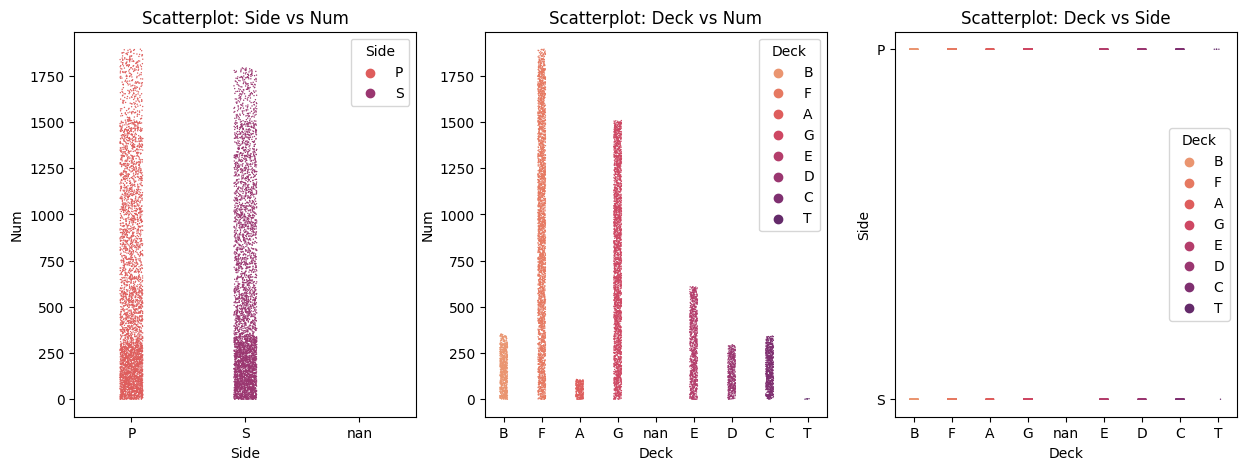

In [206]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.stripplot(data=cabin_df, x="Side", y="Num", ax=axes[0], s=1, hue='Side', palette='flare')
axes[0].set_title("Scatterplot: Side vs Num")

sns.stripplot(data=cabin_df, x="Deck", y="Num", ax=axes[1], s=1, hue='Deck', palette='flare')
axes[1].set_title("Scatterplot: Deck vs Num")

sns.stripplot(data=cabin_df, x="Deck", y="Side", ax=axes[2], s=1, hue='Deck', palette='flare')
axes[2].set_title("Scatterplot: Deck vs Side")

plt.show()

Merge the 2 dictionaries

In [207]:
# drop Cabin
if 'Cabin' in data.keys():
    data = data.drop(['Cabin'], axis=1)

In [208]:
# merge the two dataframe
data = pd.concat([data, cabin_df], axis=1)
data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Group  Member Deck  Num Side  
0           0.0     0.0     0.0      1       1    B  0.0    P  
1          25.0   549.0    44.0      2       1    F  0.0    S  
2           0.0  6715.0    49.0      3       1    A  0.0    S  
3         371.0  3329.0   193.0      3       2    A  0.0    S  
4         151.0   565.0     2.0      4       1    F  1.0    S

## New analysis for new features

In [209]:
for f in data.keys():
    print(f,type(data[f][0]))
    if type(data[f][0]) == float:
        print(f)

HomePlanet <class 'str'>
CryoSleep <class 'bool'>
Destination <class 'str'>
Age <class 'numpy.float64'>
VIP <class 'bool'>
RoomService <class 'numpy.float64'>
FoodCourt <class 'numpy.float64'>
ShoppingMall <class 'numpy.float64'>
Spa <class 'numpy.float64'>
VRDeck <class 'numpy.float64'>
Group <class 'numpy.int64'>
Member <class 'numpy.int64'>
Deck <class 'str'>
Num <class 'numpy.float64'>
Side <class 'str'>


/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_49805/840795353.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



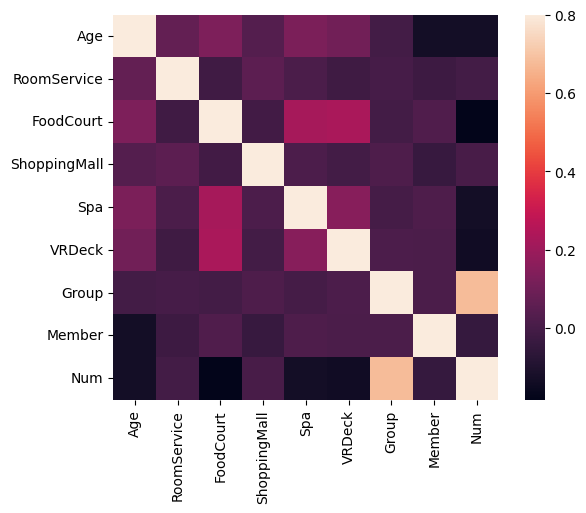

In [210]:
# correlation matrix with the new features
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Num', 'Side']
corrmat = data[num_features].corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

In [211]:
data['Side']

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Side, Length: 8693, dtype: object

In [212]:
size_plt = []
for s in data['Side']:
    if s == 'S':
        size_plt.append(1)
    if s == 'P':
        size_plt.append(10)
    if type(s) == float:
        size_plt.append(0)

size_plt

[10,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 10,
 10,
 10,
 10,
 1,
 10,
 0,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 10,
 10,
 1,
 10,
 10,
 10,
 1,
 10,
 1,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 1,
 1,
 10,
 10,
 1,
 10,
 1,
 1,
 10,
 1,
 1,
 10,
 10,
 10,
 1,
 1,
 10,
 1,
 1,
 1,
 1,
 10,
 10,
 10,
 1,
 10,
 10,
 10,
 10,
 0,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 1,
 0,
 10,
 10,
 10,
 1,
 1,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 1,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 10,
 10,
 1,
 10,
 10,
 10,
 1,
 1,
 1,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 10,
 1,
 1,
 10,
 1,
 1,
 10,
 1,
 10,
 1,
 1,
 10,
 10,
 10,
 10,
 10,
 1,
 10,
 1,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 10,
 1,
 1,
 10,
 10,
 1,
 1,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 1,
 10,
 10,
 0

In [213]:
#Plot the distibution of Group and Num since they are the most correlated features using color to distinguish the Deck, using scatterplot, using plotly
import plotly.express as px
fig = px.scatter(data, x="Group", y="Num", color="Deck", trendline="ols", template="simple_white", size=size_plt)
fig.show()


In [214]:
# add data['Alone'] feature of all 0
data['Alone'] = np.zeros(len(data['Group']))

In [215]:
# create feature "Alone" to check if the passenger is alone or not
id = 0
numb_alone = 0
for g in data['Group']:
    id += 1
    # print(g)
    count = 0
    for m in data['Member'][data['Group'] == g]:
        count += 1
    if count == 1:
        # print("Alone", id)
        numb_alone += 1
        data['Alone'][id] = 1
    else:
        data["Alone"][id] = 0

data["Alone"].sum()

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_49805/1328679265.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_49805/1328679265.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4805.0

In [216]:
data['Deck'][data['Alone'] == 1].isna().sum()

98

In [217]:
# #Plot the distibution of Group and Num since they are the most correlated features using color to distinguish the Deck, using scatterplot, using plotly
# import plotly.express as px
# filtered_data = data[data['Alone'] == 0]
# fig = px.scatter(data[data['Alone'] == 0], x="Group", y="Num", trendline="ols",  color_discrete_map={'points': 'blue'})
# # fig = px.scatter(data[data['Alone'] == 1], x="Group", y="Num", trendline="ols",  color='blue')

# fig.show()


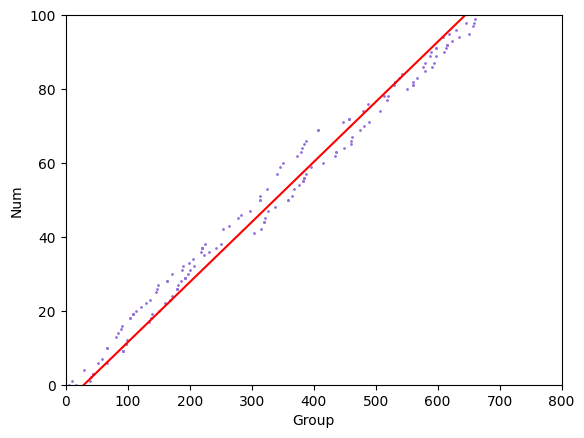

In [218]:
x = data['Group'][data['Deck'] == 'G']
y = data['Num'][data['Deck'] == 'G']

plt.scatter(x,y, color='mediumpurple', s=1)

#fit the line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.xlim(0, 800)
plt.ylim(0, 100)
plt.xlabel('Group')
plt.ylabel('Num')
plt.show()

In [219]:
# # search for a nan in the y and fill it with the value of the line
# for i in range(len(y)):
#     if np.isnan(y[i]):
#         y[i] = m*x[i] + b
#         print(y[i])

# Preprocessing

In [220]:
data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Group  Member Deck  Num Side  Alone  
0           0.0     0.0     0.0      1       1    B  0.0    P    0.0  
1          25.0   549.0    44.0      2       1    F  0.0    S    1.0  
2           0.0  6715.0    49.0      3       1    A  0.0    S    1.0  
3         371.0  3329.0   193.0      3       2    A  0.0    S    0.0  
4         151.0   565.0     2.0      4       1    F  1.0    S    0.0

# Missing Values

In [221]:
data.isna().any()

HomePlanet       True
CryoSleep        True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Group           False
Member          False
Deck             True
Num              True
Side             True
Alone           False
dtype: bool

In [222]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Deck                     199                2.29
Num                      199                2.29
Side                     199                2.29

WE cannot seimply delete the missing values because we will lose a lot of data.

In [223]:
data[na_cols].isna()

HomePlanet  CryoSleep  Destination    Age    VIP  RoomService  \
0          False      False        False  False  False        False   
1          False      False        False  False  False        False   
2          False      False        False  False  False        False   
3          False      False        False  False  False        False   
4          False      False        False  False  False        False   
...          ...        ...          ...    ...    ...          ...   
8688       False      False        False  False  False        False   
8689       False      False        False  False  False        False   
8690       False      False        False  False  False        False   
8691       False      False        False  False  False        False   
8692       False      False        False  False  False        False   

      FoodCourt  ShoppingMall    Spa  VRDeck   Deck    Num   Side  
0         False         False  False   False  False  False  False  
1         False         False  False   False  False  False  False  
2         False         False  False   False  False  False  False  
3         False         False  False   False  False  False  False  
4         False         False  False   False  False  False  False  
...         ...           ...    ...     ...    ...    ...    ...  
8688      False         False  False   False  False  False  False  
8689      False         False  False   False  False  False  False  
8690      False         False  False   False  False  False  False  
8691      False         False  False   False  False  False  False  
8692      False         False  False   False  False  False  False  

[8693 rows x 13 columns]

In [224]:
# # Heatmap of missing values
# plt.figure(figsize=(12,6))
# sns.heatmap(data[na_cols].isna().T)

A passenger has 13 features. Since we saw that the maximum number of missing feature for a single passanger is 3 the percentage of missing feature is relatively low. So we choose not to eliminate entrances but instead fill the missing values. 


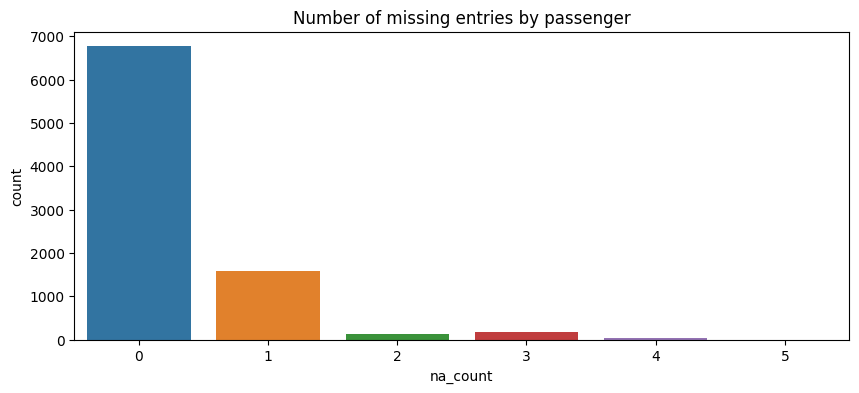

In [225]:
# Countplot of number of missing values by passenger
data['na_count']=data.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='na_count')
plt.title('Number of missing entries by passenger')
data.drop('na_count', axis=1, inplace=True)

## Fill missing values

We will use here the median for the numerical feature and then the mode for categorical ones.

In [226]:
data.isna().sum(axis=0)

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Group             0
Member            0
Deck            199
Num             199
Side            199
Alone             0
dtype: int64

Numerical Data

In [227]:
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Num']
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Alone','Side']


In [228]:
data[num_features].median()

Age               27.0
RoomService        0.0
FoodCourt          0.0
ShoppingMall       0.0
Spa                0.0
VRDeck             0.0
Group           4630.0
Member             1.0
Num              427.0
dtype: float64

In [229]:
# Impute median (for continuous data)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['RoomService'].fillna(data['RoomService'].median(), inplace=True)
data['FoodCourt'].fillna(data['FoodCourt'].median(), inplace=True)
data['ShoppingMall'].fillna(data['ShoppingMall'].median(), inplace=True)
data['Spa'].fillna(data['Spa'].median(), inplace=True)
data['VRDeck'].fillna(data['VRDeck'].median(), inplace=True)
data['Group'].fillna(data['Group'].median(), inplace=True)
data['Member'].fillna(data['Member'].median(), inplace=True)
data['Num'].fillna(data['Num'].median(), inplace=True)

Catetorical Data

In [230]:
# Find the mode for the categorical data that are missing
print(data['HomePlanet'].mode()[0])
print(data['CryoSleep'].mode()[0])
print(data['Destination'].mode()[0])
print(data['VIP'].mode()[0])
print(data['Deck'].mode()[0])
print(data['Alone'].mode()[0])
print(data['Side'].mode()[0])


Earth
False
TRAPPIST-1e
False
F
1.0
S


In [231]:
# Impute most frequent category (for categorical data)
data['HomePlanet'].fillna('Earth', inplace=True)
data['CryoSleep'].fillna(False, inplace=True)
data['Destination'].fillna('TRAPPIST-1e', inplace=True)
data['VIP'].fillna(False, inplace=True)
data['Deck'].fillna('F', inplace=True)
data['Alone'].fillna(1, inplace=True)
data['Side'].fillna('S', inplace=True)


Qualitative Data

<html>
<body>

<p> <font color="red"> <b> La cabina non è stata fillat peerchè è un problema, ci sta lavorando angelo </b> </font> </p>




In [232]:
# data['Cabin'].mode()

In [233]:
# # Impute outliers (for qualitative data)
# data['Cabin'].fillna('G/734/S', inplace=True)
# data['Name'].fillna('No Name', inplace=True)


In [234]:
data.isna().sum(axis=0)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Member          0
Deck            0
Num             0
Side            0
Alone           0
dtype: int64

Numerical Data

Drop the features that we don't need

In [235]:
# # Drop qualitative/redundant/collinear/high cardinality features
# data.drop(['PassengerId', 'Cabin', 'Name', ''], axis=1, inplace=True)
# data

# Normalization

**Min-Max Normalization**

In [236]:
# normaize features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features])
data.head()


HomePlanet  CryoSleep  Destination       Age    VIP  RoomService  FoodCourt  \
0     Europa      False  TRAPPIST-1e  0.493671  False     0.000000   0.000000   
1      Earth      False  TRAPPIST-1e  0.303797  False     0.007608   0.000302   
2     Europa      False  TRAPPIST-1e  0.734177   True     0.003001   0.119948   
3     Europa      False  TRAPPIST-1e  0.417722  False     0.000000   0.043035   
4      Earth      False  TRAPPIST-1e  0.202532  False     0.021149   0.002348   

   ShoppingMall       Spa    VRDeck     Group    Member Deck       Num Side  \
0      0.000000  0.000000  0.000000  0.000000  0.000000    B  0.000000    P   
1      0.001064  0.024500  0.001823  0.000108  0.000000    F  0.000000    S   
2      0.000000  0.299670  0.002030  0.000216  0.000000    A  0.000000    S   
3      0.015793  0.148563  0.007997  0.000216  0.142857    A  0.000000    S   
4      0.006428  0.025214  0.000083  0.000323  0.000000    F  0.000528    S   

   Alone  
0    0.0  
1    1.0  
2    1.0  
3    0.0  
4    0.0

In [237]:
# PCA over the numerical features with 3 components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(data[num_features])
total_var = pca.explained_variance_ratio_.sum() * 100

In [238]:
import plotly.express as px
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color = label, size=0.1*np.ones(len(data[num_features])),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

In [239]:
#one hot encode the categorical features
data_encoded = pd.get_dummies(data, columns=cat_features)
data_encoded.head()


Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0  0.493671     0.000000   0.000000      0.000000  0.000000  0.000000   
1  0.303797     0.007608   0.000302      0.001064  0.024500  0.001823   
2  0.734177     0.003001   0.119948      0.000000  0.299670  0.002030   
3  0.417722     0.000000   0.043035      0.015793  0.148563  0.007997   
4  0.202532     0.021149   0.002348      0.006428  0.025214  0.000083   

      Group    Member       Num  HomePlanet_Earth  ...  Deck_C  Deck_D  \
0  0.000000  0.000000  0.000000                 0  ...       0       0   
1  0.000108  0.000000  0.000000                 1  ...       0       0   
2  0.000216  0.000000  0.000000                 0  ...       0       0   
3  0.000216  0.142857  0.000000                 0  ...       0       0   
4  0.000323  0.000000  0.000528                 1  ...       0       0   

   Deck_E  Deck_F  Deck_G  Deck_T  Alone_0.0  Alone_1.0  Side_P  Side_S  
0       0       0       0       0          1          0       1       0  
1       0       1       0       0          0          1       0       1  
2       0       0       0       0          0          1       0       1  
3       0       0       0       0          1          0       0       1  
4       0       1       0       0          1          0       0       1  

[5 rows x 31 columns]

In [240]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline(
    [
        ("scaler", StandardScaler()), ("pca", PCA(random_state = 72))
    ] # list of steps: (name, object)
)

pipe = pipe.fit(data_encoded)

In [241]:
x_pc = pd.DataFrame(pipe.transform(data_encoded), columns = [f"x{i+1}" for i in range(pipe.named_steps["pca"].n_components_)])
x_pc.head()


x1        x2        x3        x4        x5        x6        x7  \
0  2.518105 -0.227726  0.791966  0.005986  1.182878 -1.728964 -1.187786   
1 -0.825417  1.394857 -0.818242 -0.501959 -1.708540 -0.537424 -1.073216   
2  6.543616  3.404654 -2.768931  1.912514 -0.109336  6.499953 -4.084145   
3  3.499820  0.188661  0.929491  0.730717 -1.788368 -0.836257 -1.660073   
4 -0.447334  0.590432  1.392513  0.340367 -1.855025 -0.399103 -1.024414   

         x8        x9       x10  ...       x22       x23       x24  \
0 -0.103897 -1.780523  0.912611  ... -1.398575 -0.409494 -0.601642   
1  0.796266 -2.122107 -0.545230  ...  0.420124  0.244146  0.290555   
2 -0.944403 -1.952712 -0.333933  ...  0.527110 -0.226384 -0.915646   
3  0.019585 -1.391898  0.058510  ... -0.167676 -0.330945 -0.883123   
4  1.121694 -2.169786 -0.497845  ...  0.504321  0.255046  0.277229   

            x25           x26           x27           x28           x29  \
0 -3.122386e-15 -6.292965e-15 -1.238160e-15  1.220065e-15 -1.945002e-15   
1 -4.199464e-15 -5.822811e-16 -1.968916e-16 -1.036935e-15  1.188748e-15   
2 -3.283530e-15  5.995790e-15  3.577867e-15 -5.928455e-16 -1.031698e-15   
3 -3.581903e-15 -4.330948e-16 -2.320193e-15 -1.592046e-15 -1.113230e-15   
4 -3.776192e-15 -4.608504e-16 -1.987126e-15 -1.370002e-15 -2.001408e-15   

            x30           x31  
0  5.622209e-16 -1.036672e-15  
1 -6.350068e-16  9.296882e-16  
2 -1.967274e-15  5.827435e-16  
3 -3.435733e-16  6.408568e-16  
4 -6.211290e-16  9.149431e-16  

[5 rows x 31 columns]

In [242]:
fig = px.scatter_3d(
    x_pc, x = "x1", y = "x2", z="x3", color=label, size=0.1*np.ones(len(data_encoded)), opacity = 0.1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()

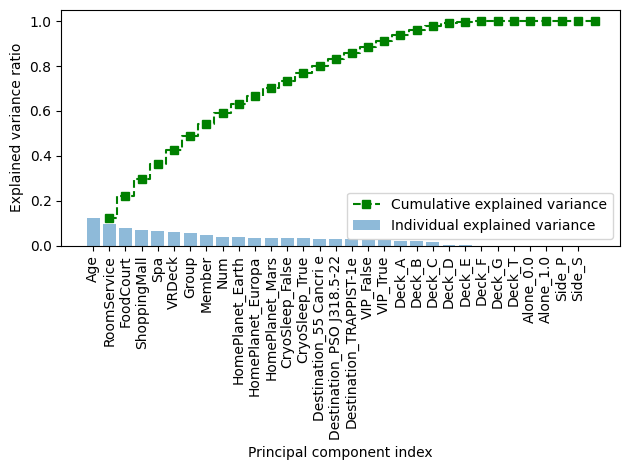

In [243]:
#impirt preprocessor.fit_transform
from sklearn import preprocessing
preprocessor = preprocessing.StandardScaler()
cov_mat = np.cov(preprocessor.fit_transform(data_encoded,label).T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)

var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(data_encoded.keys(), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
#rotate the xticks
plt.xticks(rotation=90)
plt.step(range(1, len(var_exp)+1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance'
                     , color = 'green', linestyle = '--', marker = 's')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show();

In [252]:
# try to clusterize data using the density based clustering algorithm DBSCAN the pca data
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=5, min_samples=10).fit(x_pc)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pc, labels))


# #############################################################################
# Plot result using plotly
import plotly.express as px
fig = px.scatter_3d(
    x_pc, x = "x1", y = "x2", z="x3", color=labels, size=0.1*np.ones(len(data_encoded)), opacity = 0.1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()


[0 0 4 ... 0 0 0]
Number of clusters: 6
Estimated number of clusters: 6
Silhouette Coefficient: 0.254


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (3).

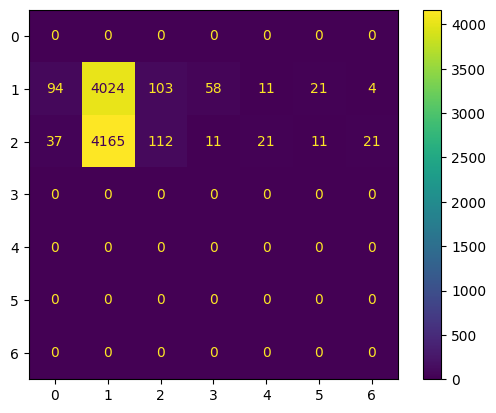

In [253]:
# complare the clusterization with the real data with a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(label, labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2'])
disp.plot()
